In [1]:
#Import all necessary packages
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

#### Read in the credit ratings data from Compustat
#### NOTE: The data is for 01/31/2017

In [2]:
credit_ratings = pd.read_csv('Credit_Ratings_Big.csv')
credit_ratings.head()

,gvkey,splticrm,datadate,spcsrc,conm,tic
0,1004,BBB,01/31/2000,B,AAR CORP,AIR
1,1004,BBB,02/29/2000,B,AAR CORP,AIR
2,1004,BBB,03/31/2000,B,AAR CORP,AIR
3,1004,BBB,04/30/2000,B,AAR CORP,AIR
4,1004,BBB,05/31/2000,B,AAR CORP,AIR


In [3]:
credit_ratings = credit_ratings.rename(columns={'tic': 'TICKER'})
credit_ratings.head()

,gvkey,splticrm,datadate,spcsrc,conm,TICKER
0,1004,BBB,01/31/2000,B,AAR CORP,AIR
1,1004,BBB,02/29/2000,B,AAR CORP,AIR
2,1004,BBB,03/31/2000,B,AAR CORP,AIR
3,1004,BBB,04/30/2000,B,AAR CORP,AIR
4,1004,BBB,05/31/2000,B,AAR CORP,AIR


#### Check to see how many companies are missing a credit rating and drop them


In [4]:
credit_ratings.splticrm.isnull().value_counts()

False    269746
True      41995
Name: splticrm, dtype: int64

In [5]:
credit_ratings['splticrm'] = credit_ratings['splticrm'].fillna(credit_ratings['spcsrc'])

In [6]:
credit_ratings.splticrm.isnull().value_counts()

False    306496
True       5245
Name: splticrm, dtype: int64

In [7]:
credit_ratings = credit_ratings.dropna(subset=['splticrm', "TICKER"])
credit_ratings

,gvkey,splticrm,datadate,spcsrc,conm,TICKER
0,1004,BBB,01/31/2000,B,AAR CORP,AIR
1,1004,BBB,02/29/2000,B,AAR CORP,AIR
2,1004,BBB,03/31/2000,B,AAR CORP,AIR
3,1004,BBB,04/30/2000,B,AAR CORP,AIR
4,1004,BBB,05/31/2000,B,AAR CORP,AIR
...,...,...,...,...,...,...
311736,316056,BBB-,10/31/2016,NaN,ALLEGION PLC,ALLE
311737,316056,BBB-,11/30/2016,NaN,ALLEGION PLC,ALLE
311738,316056,BBB-,12/31/2016,NaN,ALLEGION PLC,ALLE
311739,316056,BBB-,01/31/2017,NaN,ALLEGION PLC,ALLE


In [8]:
credit_ratings.splticrm.isnull().value_counts()

False    306236
Name: splticrm, dtype: int64

In [9]:
credit_ratings.drop_duplicates()

,gvkey,splticrm,datadate,spcsrc,conm,TICKER
0,1004,BBB,01/31/2000,B,AAR CORP,AIR
1,1004,BBB,02/29/2000,B,AAR CORP,AIR
2,1004,BBB,03/31/2000,B,AAR CORP,AIR
3,1004,BBB,04/30/2000,B,AAR CORP,AIR
4,1004,BBB,05/31/2000,B,AAR CORP,AIR
...,...,...,...,...,...,...
311736,316056,BBB-,10/31/2016,NaN,ALLEGION PLC,ALLE
311737,316056,BBB-,11/30/2016,NaN,ALLEGION PLC,ALLE
311738,316056,BBB-,12/31/2016,NaN,ALLEGION PLC,ALLE
311739,316056,BBB-,01/31/2017,NaN,ALLEGION PLC,ALLE


In [10]:
credit_ratings[(credit_ratings["datadate"] == "01/31/2014") & (credit_ratings["gvkey"] == 1045)]

,gvkey,splticrm,datadate,spcsrc,conm,TICKER
374,1045,B,01/31/2014,C,AMERICAN AIRLINES GROUP INC,AAL


In [11]:
credit_ratings.isna().sum()


gvkey           0
splticrm        0
datadate        0
spcsrc      79952
conm            0
TICKER          0
dtype: int64

#### Get a txt file of all gvkeys in order to get chosen metrics out of WRDS

In [12]:
#Get all gvkeys in to a list
gvkey_list = credit_ratings.gvkey.unique()

In [13]:
#Use this .txt file in order to get all necessary data in WRDS for each ticker
gvkey_file = open('gvkey.txt','w')
for i in gvkey_list:
    gvkey_file.write(str(i) + '\n')
gvkey_file.close()

In [14]:
len(gvkey_list)

1846

In [15]:
credit_ratings["datadate"].value_counts()

01/31/2017    1846
02/28/2017    1827
12/31/2016    1826
11/30/2016    1823
10/31/2016    1814
              ... 
05/31/2000    1136
04/30/2000    1130
03/31/2000    1126
02/29/2000    1122
01/31/2000    1120
Name: datadate, Length: 206, dtype: int64

#### We took the gvkey_list and ran it through WRDS for 01/31/17 to get the B/M , P/Sales, ROA, D/E, Int coverage ratio

In [16]:
stock_data = pd.read_csv('stock_data_big.csv')
stock_data.head()

,gvkey,adate,qdate,public_date,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield,TICKER
0,1004,05/31/1999,11/30/1999,01/31/2000,0.858,0.460,0.138,1.197,3.830,3.023,1.92%,AIR
1,1004,05/31/1999,11/30/1999,02/29/2000,0.858,0.618,0.138,1.197,3.830,3.023,1.43%,AIR
2,1004,05/31/1999,11/30/1999,03/31/2000,0.858,0.434,0.138,1.197,3.830,3.023,2.04%,AIR
3,1004,05/31/1999,02/29/2000,04/30/2000,0.617,0.381,0.141,1.194,3.673,2.991,2.26%,AIR
4,1004,05/31/1999,02/29/2000,05/31/2000,0.617,0.351,0.141,1.194,3.673,2.991,2.45%,AIR


In [17]:
# My plan now is to merge this data on gvkey / ticker to get the ratings and the data with metrics for all stocks / tickers
#available on 1/31/2017

In [18]:
stock_data.rename({"public_date":"datadate"}, axis=1, inplace=True)

In [19]:
df = pd.merge(credit_ratings, stock_data, how="left",  on = ['gvkey', "TICKER", "datadate"])
df.drop(["adate",'qdate'], axis=1, inplace=True)

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.drop("spcsrc", axis=1, inplace=True)

In [22]:
assert df.shape[0] == credit_ratings.shape[0]

In [23]:
# QUESTION: why do some companies have credit rating if they have not gone public

In [24]:
df = df.dropna()

In [25]:
df["splticrm"].value_counts()

BBB     12641
BBB+     9291
A        8112
BBB-     7561
A-       7072
BB+      4110
BB       3844
A+       3840
BB-      2869
B+       2601
AA-      1603
B        1559
AA       1309
B-       1305
AAA       975
C         739
AA+       238
D         102
CCC+       22
CC          2
Name: splticrm, dtype: int64

In [26]:
df["target"] = [np.nan] * len(df)

In [27]:
# 1 is investment grade, 0 is junk
df.loc[df['splticrm'].isin(["AAA","AA","A","BBB"]), "target"] = 1
df.loc[~df['splticrm'].isin(["AAA","AA","A","BBB"]), "target"] = 0

In [28]:
df.target.value_counts()

0.0    46758
1.0    23037
Name: target, dtype: int64

In [29]:
df.sort_values("datadate")

,gvkey,splticrm,datadate,conm,TICKER,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield,target
0,1004,BBB,01/31/2000,AAR CORP,AIR,0.858,0.460,0.138,1.197,3.830,3.023,1.92%,1.0
97997,10016,A,01/31/2000,STANLEY BLACK & DECKER INC,SWK,0.317,0.821,0.209,1.807,11.362,1.540,3.50%,1.0
56314,6136,A,01/31/2000,INTERPUBLIC GROUP OF COS,IPG,0.119,2.808,0.104,4.533,8.470,1.048,.739%,1.0
22022,3107,C,01/31/2000,CLEVELAND-CLIFFS INC,CLF,1.217,0.913,0.054,0.637,12.583,3.017,5.37%,0.0
98615,10115,BB,01/31/2000,STRYKER CORP,SYK,0.130,3.287,0.152,3.309,15.505,1.967,.206%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8915,1913,BBB,12/31/2016,AVERY DENNISON CORP,AVY,0.150,1.043,0.166,3.393,9.218,1.137,2.34%,1.0
615,1075,A-,12/31/2016,PINNACLE WEST CAPITAL CORP,PNW,0.944,2.486,0.088,2.276,4.137,0.651,3.36%,0.0
36350,4383,A,12/31/2016,ATMOS ENERGY CORP,ATO,0.655,2.326,0.101,1.891,5.626,0.381,2.43%,1.0
136987,14359,BBB-,12/31/2016,PIONEER NATURAL RESOURCES CO,PXD,0.376,8.648,-0.016,0.658,-8.652,2.391,.044%,0.0


In [30]:
df['divyield'] = df['divyield'].str.rstrip('%').astype('float') / 100.0


In [31]:
features = [x for x in df.columns if x not in ['gvkey', 'splticrm', 'datadate', 'conm', 'TICKER', 'target']]

In [32]:
features

['bm', 'ps', 'roa', 'de_ratio', 'intcov_ratio', 'curr_ratio', 'divyield']

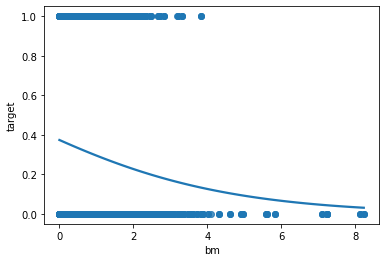

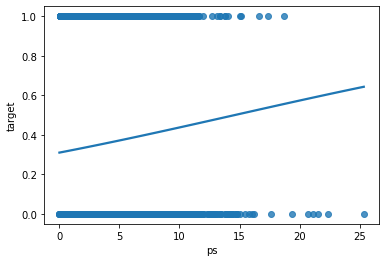

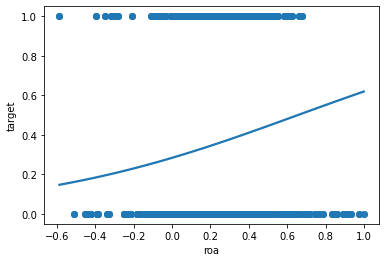

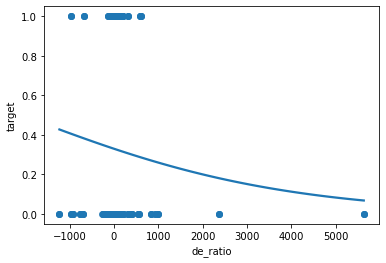

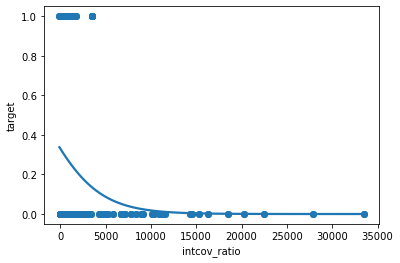

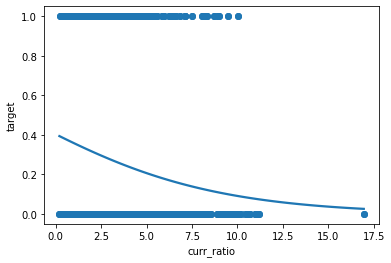

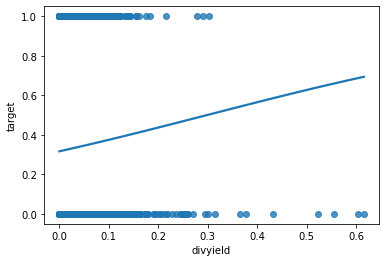

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(len(features)):
    feature = features[i]
    plt.figure(i)
    sns.regplot(x=feature, y="target", data=df, logistic=True, ci=None)
    plt.show()


In [40]:
X = df[["datadate"] + features]
y = df["target"]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [42]:
y_train.value_counts()

0.0    37421
1.0    18415
Name: target, dtype: int64

In [43]:
# QUESTION: How to use SMOTE when cross sectional reg'ing. We have a date column

In [44]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X_train, y_train)

# y_res.value_counts()

In [45]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [46]:
formula = "target ~ " +  " + ".join(features)

In [47]:
import statsmodels.formula.api as smf

In [82]:
def logit_coef(x,formula):
    date = x.iloc[0]["datadate"]
    model = smf.logit(formula,data=x).fit(disp=0)
    file = "models/logit/" + date + ".pickle"
    model.save(file)
    
    llr_pvalue = pd.Series(model.llr_pvalue, index=["llr_pvalue"])
    prsquared = pd.Series(model.prsquared, index=["prsquared"])
    
    return model.params.append(model.pvalues.add_suffix('_pvalue')).append(prsquared).append(llr_pvalue)#.append(file)

In [84]:
def ols_coef(x,formula):
    date = x.iloc[0]["datadate"]
    model = smf.ols(formula,data=x).fit(disp=0)
    file = "models/ols/" + date + ".pickle"
    model.save(file)
    
    rsquared = pd.Series(model.rsquared, index=["rsquared"])
    rsquared_adj = pd.Series(model.rsquared_adj, index=["rsquared_adj"])
    mse_total = pd.Series(model.mse_total, index=["mse_total"])
    file = pd.Series(file, index=["file"])

    return model.params.append(model.pvalues.add_suffix('_pvalue')).append(rsquared).append(rsquared_adj).append(mse_total).append(file)

In [50]:
df_over = X_over.copy()
df_over["target"] = y_over

In [51]:
df_over["datadate"] = df_over["datadate"].str.replace("/", "_")

In [52]:
df_over

,datadate,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield,target
0,08_31_2010,0.351,1.224,0.172,1.223,35.929,2.040,0.02620,1.0
1,02_28_2007,0.045,2.828,0.329,4.581,15.132,0.952,0.01900,0.0
2,06_30_2004,0.289,0.896,0.145,1.885,6.041,1.575,0.00659,0.0
3,10_31_2007,0.986,0.956,0.094,2.675,2.408,0.934,0.04080,0.0
4,04_30_2001,0.105,0.920,0.246,1.728,12.981,1.492,0.00996,0.0
...,...,...,...,...,...,...,...,...,...
74837,12_31_2010,0.349,2.205,0.175,1.206,16.008,3.206,0.01000,1.0
74838,07_31_2003,0.144,0.820,0.295,1.882,27.556,1.427,0.00720,1.0
74839,03_31_2015,0.371,0.510,0.127,1.522,5.961,1.873,0.02710,1.0
74840,09_30_2003,0.285,0.715,0.098,3.098,3.808,1.123,0.01040,1.0


In [83]:
log_reg_df = df_over.groupby('datadate').apply(logit_coef,formula)

In [85]:
ols_reg_df = df_over.groupby('datadate').apply(ols_coef,formula)

In [86]:
log_reg_df

,Intercept,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield,Intercept_pvalue,bm_pvalue,ps_pvalue,roa_pvalue,de_ratio_pvalue,intcov_ratio_pvalue,curr_ratio_pvalue,divyield_pvalue,prsquared,llr_pvalue
datadate,,,,,,,,,,,,,,,,,,
01_31_2000,1.087824,-1.246652,0.119390,-2.237739,0.021190,-0.007289,0.113276,-2.407265,0.073978,0.003529,0.214875,0.316544,0.514783,0.145150,0.504363,0.533140,0.059267,0.003579
01_31_2001,0.221744,-0.479953,0.342943,0.468443,0.037982,-0.005209,-0.305704,0.313654,0.722554,0.200378,0.001300,0.814766,0.528234,0.281166,0.033929,0.971454,0.080938,0.000046
01_31_2002,-0.840389,0.396987,0.238410,4.818195,-0.064276,-0.000287,-0.222041,5.935581,0.195818,0.231172,0.023819,0.020399,0.371432,0.922197,0.086222,0.497211,0.046539,0.011124
01_31_2003,0.239846,-0.177288,0.214435,3.082176,-0.002514,-0.003704,-0.318314,0.213390,0.686372,0.463529,0.077490,0.176092,0.689873,0.442650,0.071845,0.974042,0.038941,0.027002
01_31_2004,1.082294,-0.234783,0.057163,0.659203,-0.002812,0.002586,-0.564357,-7.761083,0.075777,0.491004,0.529128,0.734542,0.607118,0.352985,0.003396,0.381724,0.035865,0.032905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12_31_2012,-0.057389,-0.055338,-0.024894,2.022997,-0.005150,0.000727,-0.283694,7.268638,0.908478,0.868803,0.785177,0.246908,0.561253,0.357212,0.008505,0.186583,0.023814,0.059421
12_31_2013,-1.825515,0.981914,0.176173,5.259292,-0.020046,-0.008395,-0.062055,17.212265,0.000424,0.010163,0.005724,0.007540,0.198775,0.078328,0.541675,0.034138,0.053717,0.000024
12_31_2014,0.667886,-0.432285,0.013538,0.762609,-0.208550,-0.000171,-0.162906,-1.702007,0.221616,0.275068,0.833306,0.678884,0.002526,0.838546,0.136831,0.842409,0.027426,0.011421


In [87]:
ols_reg_df

,Intercept,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield,Intercept_pvalue,bm_pvalue,ps_pvalue,roa_pvalue,de_ratio_pvalue,intcov_ratio_pvalue,curr_ratio_pvalue,divyield_pvalue,rsquared,rsquared_adj,mse_total,file
datadate,,,,,,,,,,,,,,,,,,,,
01_31_2000,0.764620,-0.294323,0.022203,-0.542387,0.004906,-0.001049,0.024375,-0.550696,3.609551e-08,0.002083,0.269775,0.263077,0.503264,0.054469,0.522954,0.486932,0.075982,0.050417,0.245918,models/ols/01_31_2000.pickle
01_31_2001,0.594381,-0.130344,0.062753,-0.026948,0.008828,-0.000440,-0.065128,0.006628,1.345705e-05,0.116288,0.001144,0.948455,0.495343,0.042401,0.037027,0.997359,0.098942,0.076089,0.249092,models/ols/01_31_2001.pickle
01_31_2002,0.341341,0.079348,0.048211,1.018208,-0.016405,-0.000047,-0.051835,1.392736,1.858368e-02,0.303276,0.027407,0.022478,0.332172,0.946237,0.080619,0.503346,0.059300,0.035442,0.248445,models/ols/01_31_2002.pickle
01_31_2003,0.584068,-0.047894,0.047014,0.597212,-0.000284,-0.000840,-0.074489,-0.057660,1.224478e-05,0.370784,0.072874,0.191530,0.690824,0.460186,0.071713,0.969824,0.049942,0.027088,0.243541,models/ols/01_31_2003.pickle
01_31_2004,0.748697,-0.055303,0.016934,0.158740,-0.000321,0.000330,-0.129822,-1.830109,1.954991e-07,0.489667,0.405429,0.723849,0.529967,0.256926,0.002723,0.389034,0.046070,0.023886,0.248287,models/ols/01_31_2004.pickle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12_31_2012,0.478143,-0.009678,-0.004992,0.471849,-0.000524,0.000170,-0.062764,1.593279,3.207030e-05,0.904360,0.820604,0.244719,0.336934,0.343928,0.006199,0.171567,0.030505,0.013707,0.249758,models/ols/12_31_2012.pickle
12_31_2013,0.094999,0.227506,0.037526,0.983770,-0.002547,-0.000306,-0.019035,4.115372,4.146935e-01,0.010641,0.005068,0.019594,0.133725,0.131778,0.392675,0.029090,0.061995,0.047038,0.250108,models/ols/12_31_2013.pickle
12_31_2014,0.461650,-0.002244,0.005401,0.332980,-0.000222,-0.000023,-0.006840,-2.192826,8.735272e-05,0.980244,0.728660,0.453451,0.295770,0.907619,0.785573,0.271603,0.007780,-0.006966,0.248862,models/ols/12_31_2014.pickle


In [88]:
ols_reg_df

,Intercept,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield,Intercept_pvalue,bm_pvalue,ps_pvalue,roa_pvalue,de_ratio_pvalue,intcov_ratio_pvalue,curr_ratio_pvalue,divyield_pvalue,rsquared,rsquared_adj,mse_total,file
datadate,,,,,,,,,,,,,,,,,,,,
01_31_2000,0.764620,-0.294323,0.022203,-0.542387,0.004906,-0.001049,0.024375,-0.550696,3.609551e-08,0.002083,0.269775,0.263077,0.503264,0.054469,0.522954,0.486932,0.075982,0.050417,0.245918,models/ols/01_31_2000.pickle
01_31_2001,0.594381,-0.130344,0.062753,-0.026948,0.008828,-0.000440,-0.065128,0.006628,1.345705e-05,0.116288,0.001144,0.948455,0.495343,0.042401,0.037027,0.997359,0.098942,0.076089,0.249092,models/ols/01_31_2001.pickle
01_31_2002,0.341341,0.079348,0.048211,1.018208,-0.016405,-0.000047,-0.051835,1.392736,1.858368e-02,0.303276,0.027407,0.022478,0.332172,0.946237,0.080619,0.503346,0.059300,0.035442,0.248445,models/ols/01_31_2002.pickle
01_31_2003,0.584068,-0.047894,0.047014,0.597212,-0.000284,-0.000840,-0.074489,-0.057660,1.224478e-05,0.370784,0.072874,0.191530,0.690824,0.460186,0.071713,0.969824,0.049942,0.027088,0.243541,models/ols/01_31_2003.pickle
01_31_2004,0.748697,-0.055303,0.016934,0.158740,-0.000321,0.000330,-0.129822,-1.830109,1.954991e-07,0.489667,0.405429,0.723849,0.529967,0.256926,0.002723,0.389034,0.046070,0.023886,0.248287,models/ols/01_31_2004.pickle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12_31_2012,0.478143,-0.009678,-0.004992,0.471849,-0.000524,0.000170,-0.062764,1.593279,3.207030e-05,0.904360,0.820604,0.244719,0.336934,0.343928,0.006199,0.171567,0.030505,0.013707,0.249758,models/ols/12_31_2012.pickle
12_31_2013,0.094999,0.227506,0.037526,0.983770,-0.002547,-0.000306,-0.019035,4.115372,4.146935e-01,0.010641,0.005068,0.019594,0.133725,0.131778,0.392675,0.029090,0.061995,0.047038,0.250108,models/ols/12_31_2013.pickle
12_31_2014,0.461650,-0.002244,0.005401,0.332980,-0.000222,-0.000023,-0.006840,-2.192826,8.735272e-05,0.980244,0.728660,0.453451,0.295770,0.907619,0.785573,0.271603,0.007780,-0.006966,0.248862,models/ols/12_31_2014.pickle


In [89]:
import math

def predict_linear_reg(x):
    #print(x["datadate"])
    coeffs = ols_reg_df.loc[x["datadate"]][["Intercept"] + features]
    prediction = coeffs["Intercept"]

    for feature in features:
        prediction += (coeffs[feature] * x[feature])

    pred = pd.Series(prediction, index=["prediction"])
    return pred


def predict_log_reg(x):
    lin_pred = predict_linear_reg(x)
    prob = math.exp(lin_pred[0]) / (1+math.exp(lin_pred[0]))
    print(prob)
    if prob > .5:
        return pd.Series(1, index=["prediction"])
    else:
        return pd.Series(0, index=["prediction"])

In [144]:
import statsmodels.api as sm

def use_saved_model_log(x):
     file = ols_reg_df.loc[x["datadate"]]["file"]
     x_df = x.to_frame().T

     x_df[x_df.columns[1:]] = x_df[x_df.columns[1:]].apply(pd.to_numeric, errors='coerce')
     model = sm.load(file)

     prob = model.predict(x_df)
     if prob.values[0] > .5:
        return pd.Series(1, index=["prediction"])
     else:
        return pd.Series(0, index=["prediction"])
     



In [65]:
X_test["datadate"] = X_test['datadate'].str.replace("/","_")

In [104]:
y_pred = X_test.apply(predict_log_reg, axis=1)

0.5941849421925828
0.6088871539048635
0.6213406755154157
0.6215939462160015
0.5835249440117084
0.6315293182407842
0.617488834451422
0.6342451958224812
0.5962551040925016
0.6285366129715515
0.6253018386126536
0.637912421286443
0.5454267981289362
0.6157474889920422
0.6235872718841654
0.6202062414113251
0.6128442952760581
0.6549952000138317
0.614794283441302
0.6341711849902567
0.6227915574427992
0.671199500534483
0.6053172662771305
0.6037906728242192
0.6778023981993363
0.6193828622658824
0.6281542751770595
0.6127154418988949
0.6267538185115585
0.6055971489594185
0.6289162322751819
0.6131955368162332
0.5868922270270627
0.6162823522155969
0.6149467272102443
0.645866713281692
0.5548370723502212
0.6399067087022267
0.7678109951965844
0.6243311008174612
0.6062365740522916
0.6142560083335051
0.6064595096643923
0.6509967031334244
0.6094050960005152
0.6521480072779697
0.6332169027234488
0.5994088663066379
0.6394764726555984
0.6680564121398488
0.6133324308597123
0.5998084129715036
0.654647652839829

In [105]:
y_pred

,prediction
27052,1
90058,1
76332,1
47068,1
218058,1
...,...
246257,1
75343,1
34999,1
94202,1


In [106]:
y_pred.value_counts("prediction")

prediction
1    13883
0       76
dtype: int64

In [96]:
X_test[0:2]

,datadate,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield
27052,07_31_2012,0.485,2.62,0.143,0.342,20.998,2.358,0.0008
90058,06_30_2008,0.480,1.09,0.116,0.893,14.212,1.566,0.0199


In [130]:
X_test[0:2].dtypes

datadate         object
bm              float64
ps              float64
roa             float64
de_ratio        float64
intcov_ratio    float64
curr_ratio      float64
divyield        float64
dtype: object

In [143]:
preds = []
for i, x in X_test.iterrows():
    file = ols_reg_df.loc[x["datadate"]]["file"]

    x_df = x.to_frame().T
    
    model = sm.load(file)
    
    x_df[x_df.columns[1:]] = x_df[x_df.columns[1:]].apply(pd.to_numeric, errors='coerce')
    prob = model.predict(x_df)
    if prob > .5:
        preds.append(1)
    else:
        preds.append(0)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [146]:
y_pred = X_test.apply(use_saved_model_log, axis=1)

In [147]:
y_pred.value_counts("prediction")

prediction
0    7592
1    6367
dtype: int64

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[5265 4072]
 [2327 2295]]
0.5415860735009671


In [151]:
# QUESTION: Should we also cross section our other classfifers

In [ ]:
from imblearn.over_sampling import SMOTE

# Answer here
smote = SMOTE(random_state=15)
X_res, y_res = smote.fit_resample(X_train, y_train)

y_res.value_counts()

In [89]:
df[df["bm"].isna()]

,gvkey,splticrm,datadate,conm,TICKER,bm,ps,roa,de_ratio,intcov_ratio,curr_ratio,divyield


In [73]:
df.isna().sum()

gvkey                0
splticrm             0
datadate             0
conm                 0
TICKER               0
bm              169756
ps              165146
roa             165301
de_ratio        165174
intcov_ratio    176375
curr_ratio      188742
divyield        216081
dtype: int64

In [87]:
df.splticrm.value_counts()

BBB     39925
BBB+    32696
BBB-    29051
A-      26883
A       23238
B       22154
B+      21802
BB-     18772
BB      17988
BB+     16225
A+      14239
B-      13036
AA-      8150
C        7703
AA       4240
D        3350
AAA      2279
CCC+     1930
AA+      1303
CCC       694
CC        263
CCC-      190
SD        125
Name: splticrm, dtype: int64

In [44]:
df["target"] = [np.nan] * len(df)


In [45]:
df

,public_date,gvkey,bm,ps,roa,de_ratio,intcov_ratio,TICKER,splticrm,spcsrc,conm,target
0,1/31/2017,1004,0.711,0.680,0.070,0.701,12.774,AIR,BB+,B,AAR CORP,NaN
1,1/31/2017,1045,0.231,0.561,0.167,9.525,6.421,AAL,BB-,C,AMERICAN AIRLINES GROUP INC,NaN
2,1/31/2017,1075,0.944,2.473,0.088,2.276,4.137,PNW,A-,A,PINNACLE WEST CAPITAL CORP,NaN
3,1/31/2017,1078,0.334,3.472,0.122,0.916,17.428,ABT,BBB,B,ABBOTT LABORATORIES,NaN
4,1/31/2017,1161,0.060,2.351,-0.006,-14.809,-0.938,AMD,CCC+,B-,ADVANCED MICRO DEVICES,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
882,1/31/2017,189517,0.775,0.652,0.143,3.180,1.786,ENVA,B,NaN,ENOVA INTERNATIONAL INC,NaN
883,1/31/2017,191255,0.506,1.312,0.105,1.487,6.640,VAC,BB+,C,MARRIOTT VACATIONS WORLDWIDE,NaN
884,1/31/2017,192255,0.541,1.278,0.100,1.697,2.585,ACHC,B+,B-,ACADIA HEALTHCARE CO INC,NaN
885,1/31/2017,233491,NaN,0.456,0.030,-8.254,-0.701,MX,CCC+,C,MAGNACHIP SEMICONDUCTOR CORP,NaN


In [49]:
df

,public_date,gvkey,bm,ps,roa,de_ratio,intcov_ratio,TICKER,splticrm,spcsrc,conm,target
0,1/31/2017,1004,0.711,0.680,0.070,0.701,12.774,AIR,BB+,B,AAR CORP,2.0
1,1/31/2017,1045,0.231,0.561,0.167,9.525,6.421,AAL,BB-,C,AMERICAN AIRLINES GROUP INC,2.0
2,1/31/2017,1075,0.944,2.473,0.088,2.276,4.137,PNW,A-,A,PINNACLE WEST CAPITAL CORP,3.0
3,1/31/2017,1078,0.334,3.472,0.122,0.916,17.428,ABT,BBB,B,ABBOTT LABORATORIES,2.0
4,1/31/2017,1161,0.060,2.351,-0.006,-14.809,-0.938,AMD,CCC+,B-,ADVANCED MICRO DEVICES,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
882,1/31/2017,189517,0.775,0.652,0.143,3.180,1.786,ENVA,B,NaN,ENOVA INTERNATIONAL INC,2.0
883,1/31/2017,191255,0.506,1.312,0.105,1.487,6.640,VAC,BB+,C,MARRIOTT VACATIONS WORLDWIDE,2.0
884,1/31/2017,192255,0.541,1.278,0.100,1.697,2.585,ACHC,B+,B-,ACADIA HEALTHCARE CO INC,2.0
885,1/31/2017,233491,NaN,0.456,0.030,-8.254,-0.701,MX,CCC+,C,MAGNACHIP SEMICONDUCTOR CORP,1.0


In [54]:
import datetime as dt

df["public_date"] = pd.to_datetime(df["public_date"])

In [58]:
df.sort_values("public_date")

,public_date,gvkey,bm,ps,roa,de_ratio,intcov_ratio,TICKER,splticrm,spcsrc,conm,target
0,2017-01-31,1004,0.711,0.680,0.070,0.701,12.774,AIR,BB+,B,AAR CORP,2.0
584,2017-01-31,27914,0.428,0.539,0.117,1.518,13.696,HUM,A-,A-,HUMANA INC,3.0
585,2017-01-31,27928,0.034,6.373,0.333,3.383,32.703,INTU,BBB+,A-,INTUIT INC,2.0
586,2017-01-31,27965,0.219,5.265,0.132,1.728,3.408,MCHP,BB,B+,MICROCHIP TECHNOLOGY INC,2.0
587,2017-01-31,28118,0.773,0.401,0.116,1.399,6.593,FOSL,BB+,C,FOSSIL GROUP INC,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
299,2017-01-31,8606,0.107,0.856,0.123,44.348,6.571,PBI,BBB-,B-,PITNEY BOWES INC,2.0
300,2017-01-31,8762,0.279,3.590,0.136,1.158,23.083,PG,AA-,A-,PROCTER & GAMBLE CO,3.0
301,2017-01-31,8807,1.007,2.011,0.075,2.698,2.093,PNM,BBB+,B+,PNM RESOURCES INC,2.0
290,2017-01-31,8455,0.593,3.172,0.099,2.891,3.272,PPL,A-,B,PPL CORP,3.0


In [34]:
print(A_rating["bm"].mean())
print(B_rating["bm"].mean())
print(C_rating["bm"].mean())

0.4672236842105264
0.6188735632183903
4.3751999999999995


In [35]:
print(A_rating["ps"].mean())
print(B_rating["ps"].mean())
print(C_rating["ps"].mean())

2.965266233766233
2.0912641509433962
2.012833333333333


In [36]:
print(A_rating["roa"].mean())
print(B_rating["roa"].mean())
print(C_rating["roa"].mean())

0.1342272727272728
0.11245417789757411
-0.0635


In [37]:
print(A_rating["de_ratio"].mean())
print(B_rating["de_ratio"].mean())
print(C_rating["de_ratio"].mean())


4.241883116883116
2.1565060728744916
8.914583333333331


In [38]:
print(A_rating["intcov_ratio"].mean())
print(B_rating["intcov_ratio"].mean())
print(C_rating["intcov_ratio"].mean())


16.728914285714275
24.32431966053749
-2.507916666666667
